In [313]:
import sys
import pickle
import matplotlib.pyplot as plt
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary'] # You will need to use more features
features_list = ['poi','salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 
                 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Explore the dataset
print "Number of people in the Enron dataset:", len(data_dict)

Number of people in the Enron dataset: 146


In [291]:
print "Number of features for each person in the dataset:", len(data_dict.values()[0])
featuresList = data_dict.values()[0].keys()
featuresList

Number of features for each person in the dataset: 21


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [292]:
# Number of pois
pois = [k for k, v in data_dict.items() if v['poi']== True]
print("There are {} persons of interest: {}".format(len(pois), pois))

There are 18 persons of interest: ['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


In [293]:
missing_values = dict(zip(features_list, [0 for _ in features_list]))
#print missing_values
for feature in features_list:
    for name in data_dict.keys():
        if data_dict[name][feature] == 'NaN':
            missing_values[feature] += 1
        
print "Missing values by feature:"
for feature in features_list:
    pct = round(float(missing_values[feature])/len(data_dict)*100,2)
    print("{}: {} ({}%)".format(feature,missing_values[feature], pct ))

Missing values by feature:
poi: 0 (0.0%)
salary: 51 (34.93%)
to_messages: 60 (41.1%)
deferral_payments: 107 (73.29%)
total_payments: 21 (14.38%)
exercised_stock_options: 44 (30.14%)
bonus: 64 (43.84%)
restricted_stock: 36 (24.66%)
shared_receipt_with_poi: 60 (41.1%)
restricted_stock_deferred: 128 (87.67%)
total_stock_value: 20 (13.7%)
expenses: 51 (34.93%)
loan_advances: 142 (97.26%)
from_messages: 60 (41.1%)
other: 53 (36.3%)
from_this_person_to_poi: 60 (41.1%)
director_fees: 129 (88.36%)
deferred_income: 97 (66.44%)
long_term_incentive: 80 (54.79%)
email_address: 35 (23.97%)
from_poi_to_this_person: 60 (41.1%)


Many features in the dataset have missing values. More than 70% values of some features such as deferral_payments, restricted_stock_deferred, loan_advances, and director_fees are NaN. Next, I'm going to check what row has the most missing data. 

In [294]:
na_dict = {}
for name in data_dict:
    na_dict[name] = 0
    for feature in features_list:
        if data_dict[name][feature]=="NaN":
            na_dict[name] += 1
sorted(na_dict.items(), key=lambda x:x[1], reverse=True)[:10] # 10 persons with the most missing data

[('LOCKHART EUGENE E', 20),
 ('WHALEY DAVID A', 18),
 ('WROBEL BRUCE', 18),
 ('THE TRAVEL AGENCY IN THE PARK', 18),
 ('GRAMM WENDY L', 18),
 ('WODRASKA JOHN', 17),
 ('CLINE KENNETH W', 17),
 ('WAKEHAM JOHN', 17),
 ('GILLIS JOHN', 17),
 ('SCRIMSHAW MATTHEW', 17)]

In [295]:
data_dict['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

A person named 'LOCKHART EUGENE E' has "NaN" in all features and is not a person of interest.

### Task 2: Remove outliers
Next, scatter plots will be constructed to examine relationships between some features in the dataset.

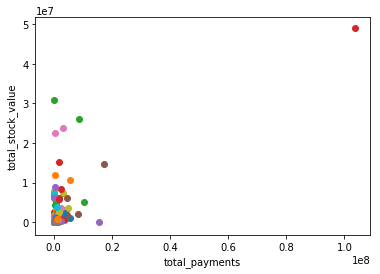

In [304]:
def plot_scatter(data_dict, feature1, feature2):
    data = featureFormat(data_dict, [feature1, feature2])
    for point in data:
        x = point[0]
        y = point[1]
        plt.scatter(x, y)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

plot_scatter(data_dict, 'total_payments', 'total_stock_value')

As can be seen from the scatter plot above, there's an outlier in the dataset with total payments and total stock values significantly higher than the rest of the data. 

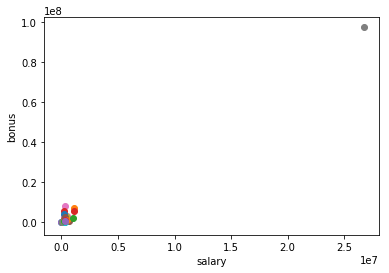

In [297]:
plot_scatter(data_dict, 'salary', 'bonus')

Similiarly, the scatter plot of salary vs. bonus also shows an outlier which is far away from all other points. 

In [298]:
max_total_pmts = 0
for entry in data_dict:
    if data_dict[entry]['total_payments'] != 'NaN' and data_dict[entry]['total_payments'] > max_total_pmts:
        max_total_pmts = data_dict[entry]['total_payments']
print "Max total payments: ", max_total_pmts
# find outlier with max salary
for k, v in data_dict.items():
    if v['total_payments']==max_total_pmts:
        print k

Max total payments:  309886585
TOTAL


In [299]:
max_sal = 0
for entry in data_dict:
    if data_dict[entry]['salary'] != 'NaN' and data_dict[entry]['salary'] > max_sal:
        max_sal = data_dict[entry]['salary']
print "Max sal: ", max_sal
# find outlier with max salary
for k, v in data_dict.items():
    if v['salary']==max_sal:
        print k

Max sal:  26704229
TOTAL


Based on the results above, the outlier is 'TOTAL', which appears to be the sum of all the rows. Hence, 'TOTAL' and  'LOCKHART EUGENE E' will be removed from the dataset.

In [314]:
outliers = ['LOCKHART EUGENE E', 'TOTAL']
for outlier in outliers:
    data_dict.pop(outlier,0)

In [315]:
### Task 3: Create new feature(s)

### Store to my_dataset for easy export below.
my_dataset = data_dict

def computeFraction(poi_messages, all_messages):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """
    fraction = 0.
    if poi_messages == "NaN" or all_messages == "NaN":
        fraction = 0.
    else:
        fraction = float(poi_messages)/float(all_messages)
    return fraction

for name in my_dataset:
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction(from_poi_to_this_person, to_messages)
    data_point["fraction_from_poi"] = fraction_from_poi # add fraction_from_poi to my_dataset
 

    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction(from_this_person_to_poi, from_messages)
    data_point["fraction_to_poi"] = fraction_to_poi # add fraction_to_poi to my_dataset

In [316]:
features_list = features_list + ["fraction_from_poi", "fraction_to_poi"]
print len(features_list)

23


After adding "fraction_from_poi" and "fraction_to_poi", our dataset has 23 features. With only 18 persons of interest, which is approximately 12% of the dataset, too many features can lead to overfitting. 
--> use selectKbest to find features with high scores.....

In [317]:
print features_list

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person', 'fraction_from_poi', 'fraction_to_poi']


In [322]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

ValueError: could not convert string to float: phillip.allen@enron.com